### Support vector classifier implementaion

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [364]:
#  Lets create synthetic data points
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [365]:
X

array([[-0.84194057,  0.7531602 ],
       [-1.05143938,  1.17512546],
       [-1.57085129, -0.38473165],
       ...,
       [-1.51604222,  0.13856937],
       [-1.54424238, -0.15470476],
       [ 0.5417339 ,  1.34658115]])

In [366]:
print(y)

[1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1
 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1
 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1
 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1
 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1
 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1
 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1
 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1
 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0
 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1
 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 0 1 0 0 0 1 

<Axes: xlabel='0', ylabel='1'>

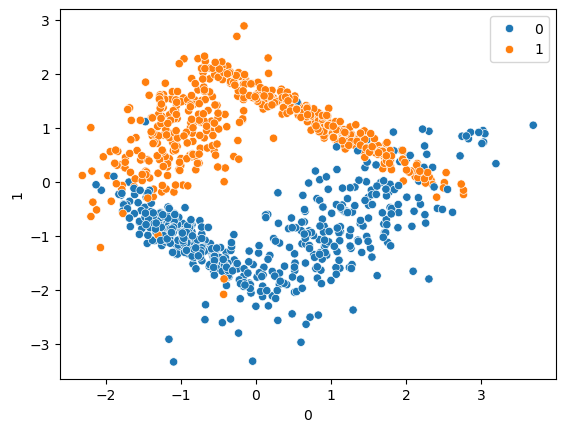

In [367]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [368]:
#  Train to split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [369]:
#  Train the model
from sklearn.svm import SVC
svc=SVC(kernel="linear")
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [370]:
#  Make prediction
y_pred=svc.predict(X_test)

In [371]:
from sklearn.metrics import accuracy_score,confusion_matrix
score=accuracy_score(y_pred,y_test)
print(score)
print(confusion_matrix(y_test,y_pred))

0.8966666666666666
[[133  12]
 [ 19 136]]


In [379]:
#  If the data will not linear seprable eassayly
rbf=SVC(kernel='rbf')
rbf.fit(X_train,y_train)

SVC()

In [380]:
#  make prediction
y_pred=rbf.predict(X_test)
score=accuracy_score(y_pred,y_test)
print(score)
print(confusion_matrix(y_test,y_pred))

0.9366666666666666
[[138   7]
 [ 12 143]]


In [377]:
#  If the data will not linear seprable eassayly
ploy=SVC(kernel="poly")
ploy.fit(X_train,y_train)
#  make prediction
y_pred=ploy.predict(X_test)
score=accuracy_score(y_pred,y_test)
print(score)
print(confusion_matrix(y_test,y_pred))

0.8966666666666666
[[134  11]
 [ 20 135]]


In [381]:
#  If the data will not linear seprable eassayly
sigmoid=SVC(kernel="sigmoid")
sigmoid.fit(X_train,y_train)
#  make prediction
y_pred=sigmoid.predict(X_test)
score=accuracy_score(y_pred,y_test)
print(score)
print(confusion_matrix(y_test,y_pred))

0.8966666666666666
[[133  12]
 [ 19 136]]


Hyperparameter tuining with svc

In [386]:
from sklearn.model_selection import GridSearchCV

#  defining parameter range
c_value=[0.1,1,10,100,1000]
gamma=[1,0.1,0.01,0.001,0.0001]
kernal=['linear', 'poly', 'rbf', 'sigmoid']
param={"C":c_value,
       "gamma":gamma,
       "kernel":kernal}

In [387]:
grid=GridSearchCV(estimator=svc,param_grid=param,refit=True,cv=5,verbose=3)

In [388]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.900 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.929 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.943 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.936 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.957 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.893 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.929 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.936 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.921 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.957 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.921 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rb

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [396]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [391]:
grid.best_estimator_
grid.best_params_
grid.best_score_

np.float64(0.9642857142857142)

In [395]:
#  prediction
y_pred=grid.predict(X_test)
# performance metrix
from sklearn.metrics import confusion_matrix,accuracy_score
score=accuracy_score(y_pred,y_test)
print("accuracy_score",score)
print("confusion_matrix \n",confusion_matrix(y_test,y_pred))

accuracy_score 0.9533333333333334
confusion_matrix 
 [[140   5]
 [  9 146]]
